In [1]:
# Stationary Models

# Correlograms and Simulations

In [2]:
# Esta es una función para calcular la correlación

rho <- function(k, beta) {
  q <- length(beta) - 1
  if (k > q) ACF <- 0 else {
    s1 <- 0; s2 <- 0
    for (i in 1:(q-k+1)) s1 <- s1 + beta[i] * beta[i+k]
    for (i in 1:(q+1)) s2 <- s2 + beta[i]^2
    ACF <- s1 / s2}
  ACF}

In [3]:
# Usando unos parámetros beta que ya te da el libro:
# Using the code above for the autocorrelation function, correlograms for a range of MA(q) processes 
# can be plotted against lag

# The code below provides an example for an MA(3) process with parameters β1 = 0.7, β2 = 0.5, and
# β3 = 0.2

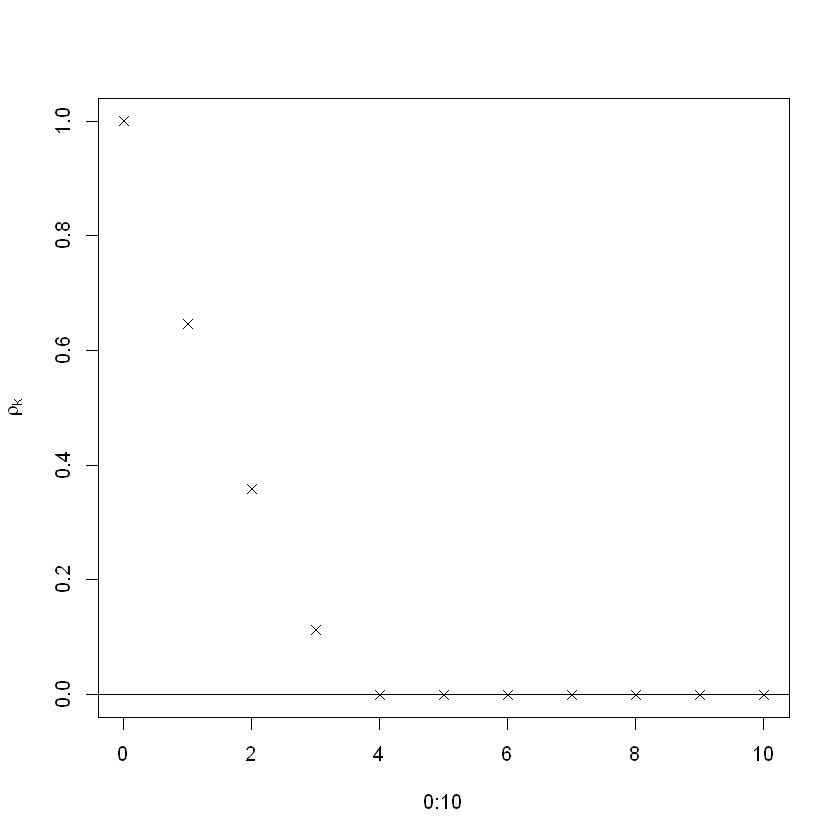

In [4]:
beta <- c(1, 0.7, 0.5, 0.2)
rho.k <- rep(1, 10)
for (k in 1:10) rho.k[k] <- rho(k, beta)

plot(0:10, c(1, rho.k), pch = 4, ylab = expression(rho[k]))
abline(0, 0)

# No entiendo bien cómo funciona este codigo anterior.

In [5]:
# The code below can be used to simulate the MA(3) process and plot the 
# correlogram of the simulated series:

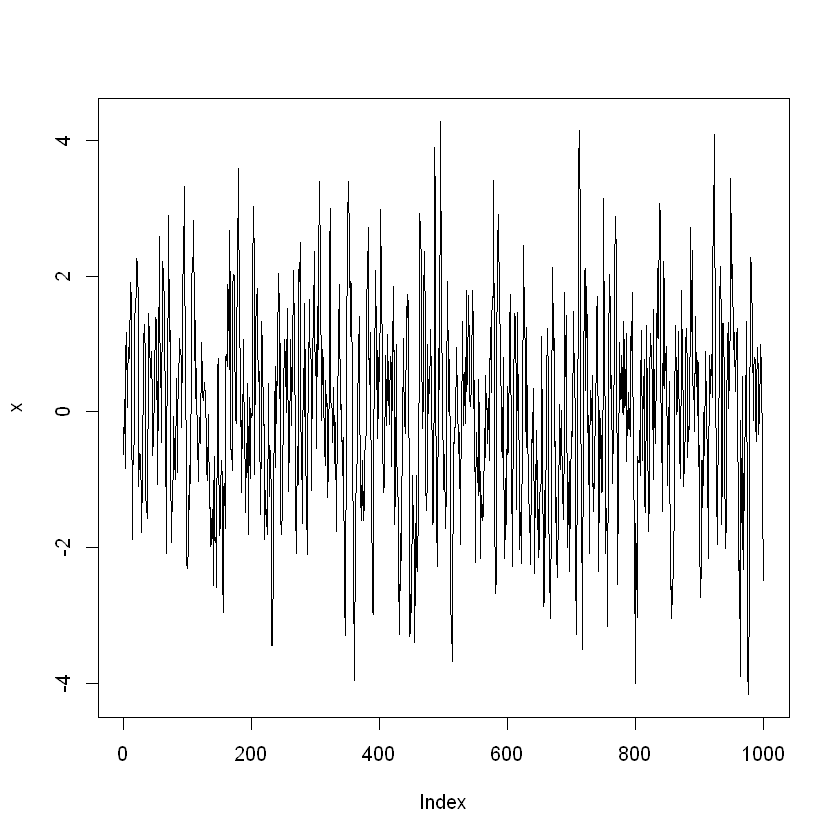

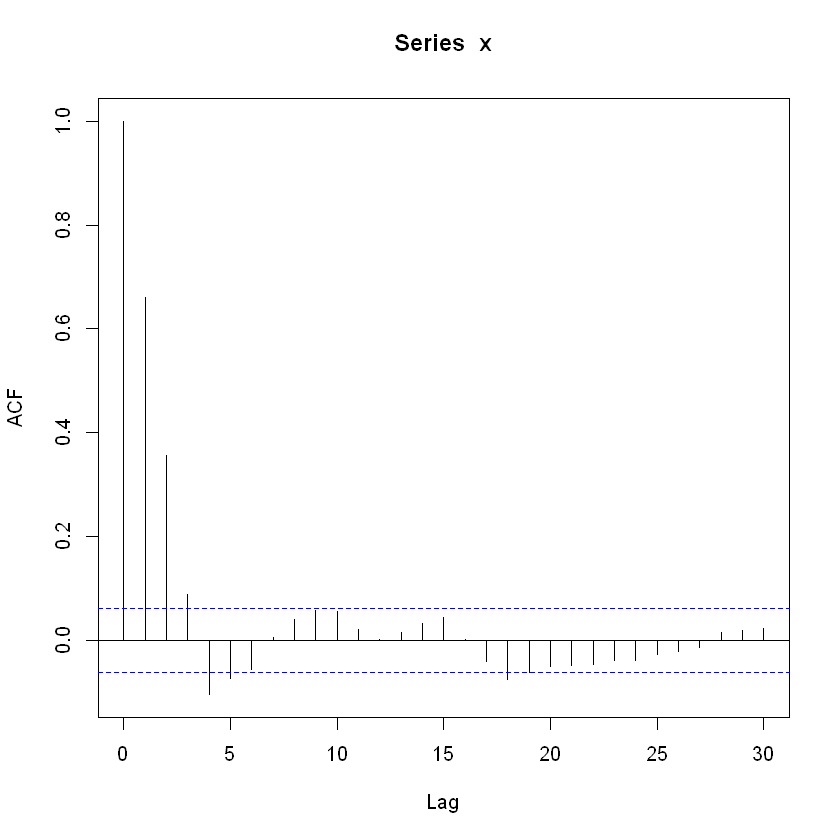

In [6]:
set.seed(1)# 
b <- c(0.8, 0.6, 0.4)
x <- w <- rnorm(1000)
for (t in 4:1000) {
  for (j in 1:3) x[t] <- x[t] + b[j] * w[t - j]
}

plot(x, type = "l")
acf(x)

# As expected, the first three autocorrelations are significantly different from 0.

# Other statistically significant correlations are attributable to random sampling variation

In [7]:
# Model fitted MA to simulated series:

# Unlike the function ar, the function arima does not subtract the mean 
# by default and estimates an intercept term. MA models cannot be expressed 
# in a multiple regression form, and, in general, the parameters are estimated
# with a numerical algorithm:

x.ma <- arima(x, order = c(0, 0, 3))
x.ma


Call:
arima(x = x, order = c(0, 0, 3))

Coefficients:
         ma1     ma2     ma3  intercept
      0.7898  0.5665  0.3959    -0.0322
s.e.  0.0307  0.0351  0.0320     0.0898

sigma^2 estimated as 1.068:  log likelihood = -1452.41,  aic = 2914.83

In [8]:
# It is possible to set the value for the mean to zero, rather than estimate
# the intercept, by using include.mean=FALSE within the arima function. This
# option should be used with caution and would only be appropriate if you
# wanted {xt} to represent displacement from some known fixed mean.

In [9]:
# Exchange rate series: Fitted MA model


In [10]:
www <- 'https://raw.githubusercontent.com/prabeshdhakal/Introductory-Time-Series-with-R-Datasets/master/pounds_nz.dat'

x <- read.table(www, header = T)
x.ts <- ts(x, st = 1991, fr = 4)
x.ma <- arima(x.ts, order = c(0, 0, 1))
x.ma

x.ra <- ar(x.ts)
x.ra



Call:
arima(x = x.ts, order = c(0, 0, 1))

Coefficients:
        ma1  intercept
      1.000     2.8329
s.e.  0.072     0.0646

sigma^2 estimated as 0.04172:  log likelihood = 4.76,  aic = -3.53


Call:
ar(x = x.ts)

Coefficients:
     1  
0.8903  

Order selected 1  sigma^2 estimated as  0.03125

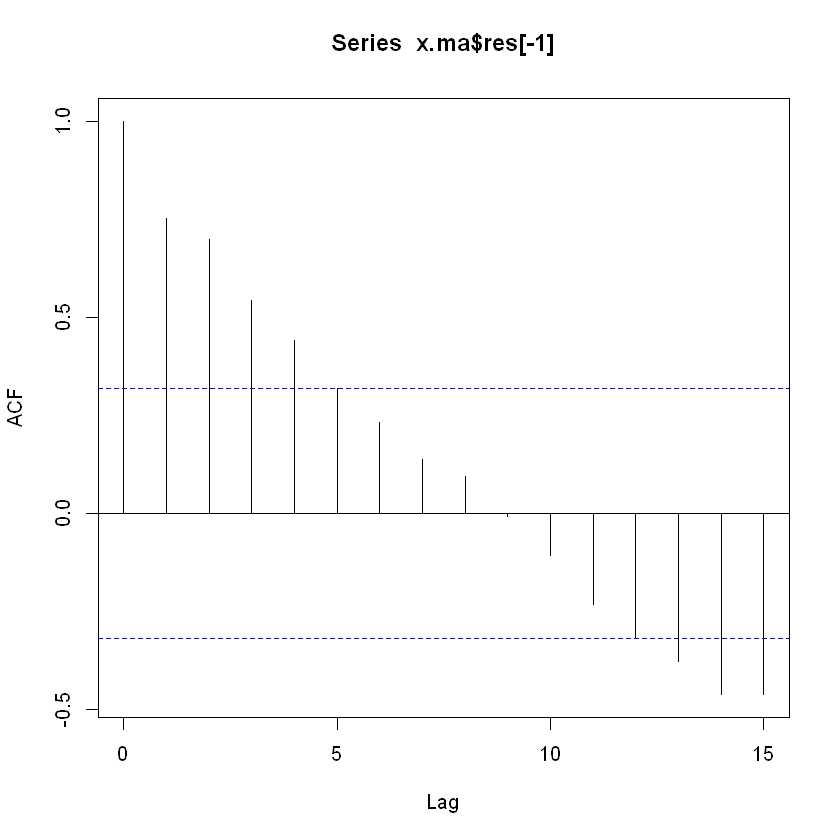

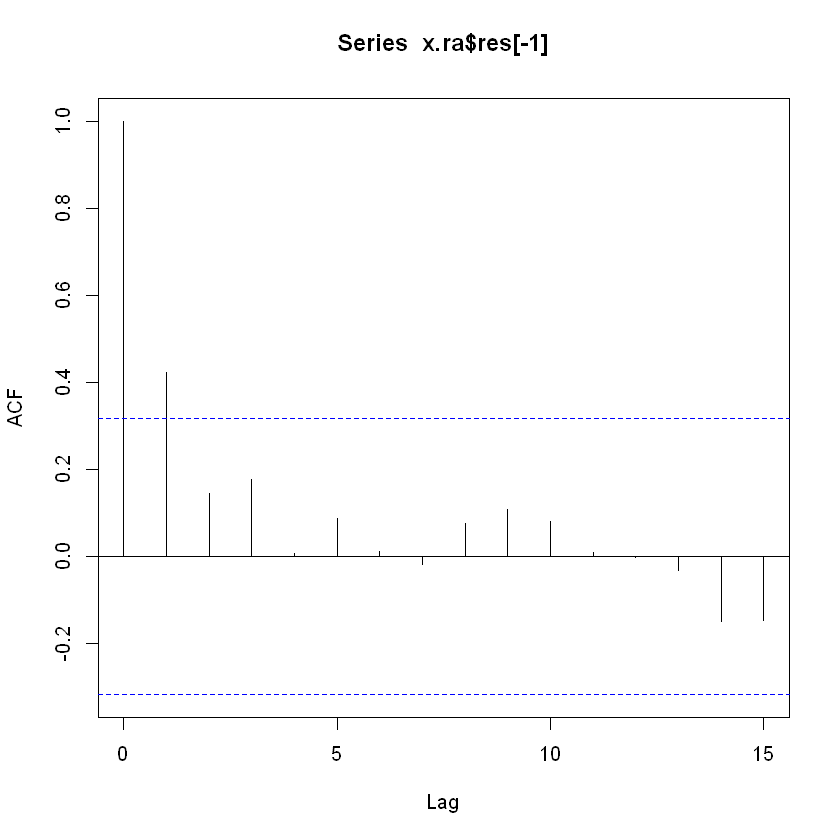

In [11]:
# En este caso la serie ajusta a un AR mejor que en AM, esto se ve en el menor
# valor sigma^2 que es menor en AR que en AM.

# Además el correlograma de los residuos de MA no son claramente una white noise:

acf(x.ma$res[-1])# no es claramente una white noise
acf(x.ra$res[-1])# este es más parecido a un white noise.


In [12]:
# Mixed models: The ARMA process

# The AR(p) model is the special case ARMA(p, 0).
# The MA(q) model is the special case ARMA(0, q).
# Parameter parsimony. When fitting to data, an ARMA model will often be more parameter efficient (i.e., require fewer parameters) than a single
# MA or AR model.

In [13]:
#  Simulation and fitting:

# The ARMA process, and the more general ARIMA processes discussed in the next chapter, can be simulated using the R function arima.sim,
# which takes a list of coefficients representing the AR and MA parameters.

# An ARMA(p, q) model can be fitted using the arima function with the order function parameter set to c(p, 0, q).

# The fitting algorithm proceeds similarly to that for an MA process. Below, data from an ARMA(1, 1) process
# are simulated for α = −0.6 and β = 0.5


In [14]:
set.seed(1)

x <- arima.sim(n = 10000, list(ar = -0.6, ma = 0.5))

coef(arima(x, order = c(1, 0, 1)))


ar1          ma1    intercept 
-0.596966371  0.502703368 -0.006571345

In [15]:
# Exchange rate series: x.ts está mas arriba.

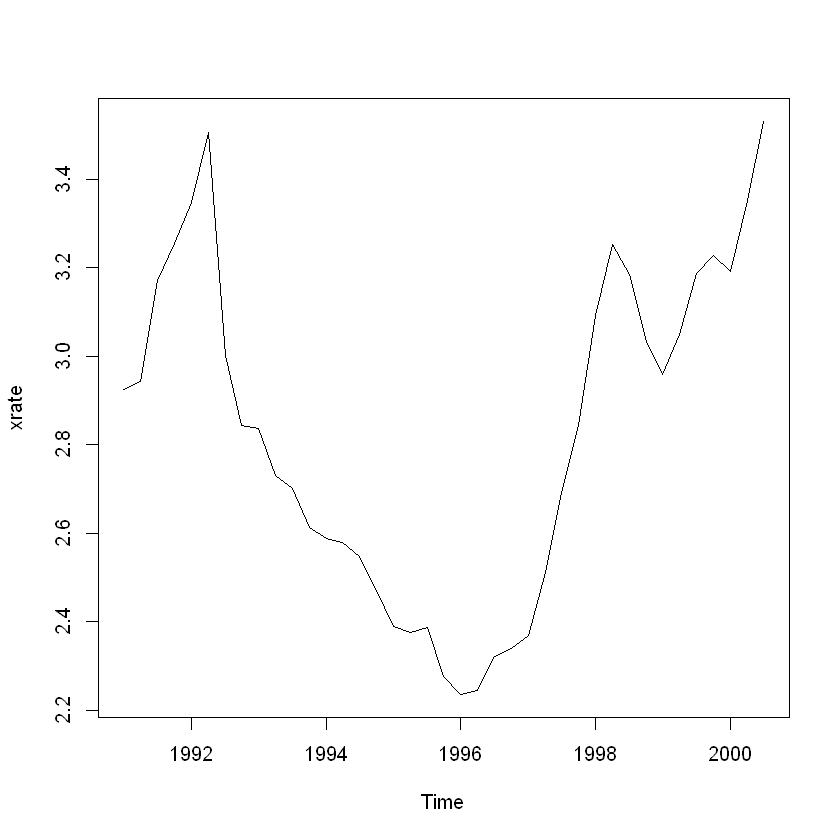

In [16]:
plot(x.ts)

x.ma <- arima(x.ts, order = c(0, 0, 1))
x.ar <- arima(x.ts, order = c(1, 0, 0))
x.arma <- arima(x.ts, order = c(1, 0, 1))


In [17]:
AIC(x.ma)
AIC(x.ar)
AIC(x.arma)# El valor más chico.


[1] -3.526895

[1] -37.40417

[1] -42.27357


Call:
arima(x = x.ts, order = c(1, 0, 1))

Coefficients:
         ar1     ma1  intercept
      0.8925  0.5319     2.9597
s.e.  0.0759  0.2021     0.2435

sigma^2 estimated as 0.01505:  log likelihood = 25.14,  aic = -42.27

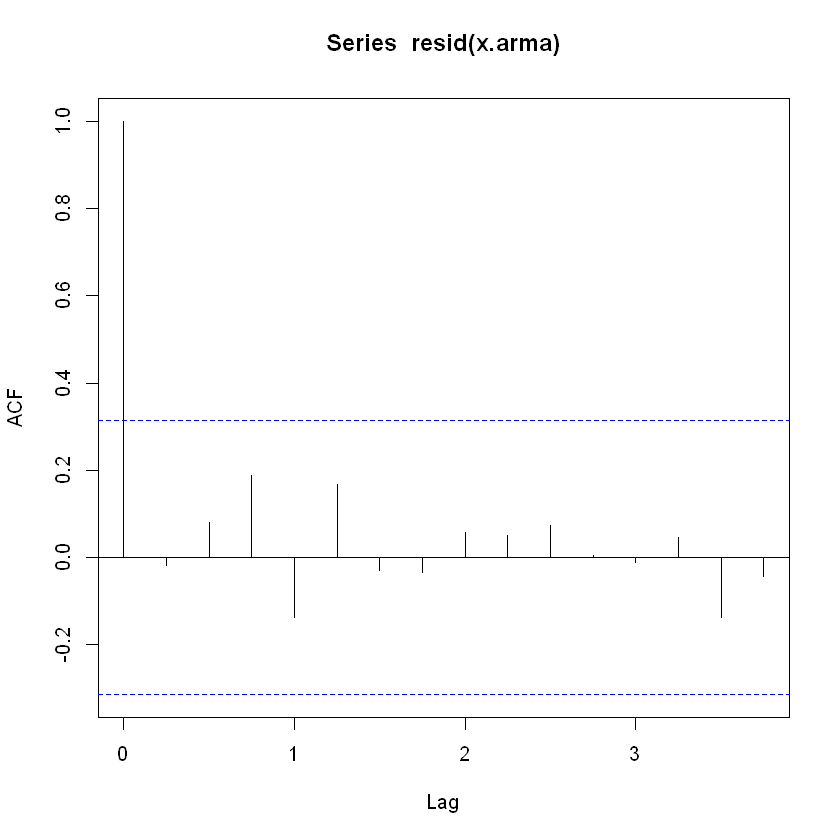

In [18]:
x.arma

acf(resid(x.arma))# los residuos aparecen como white noise, entonces el modelo
                  # arma(1,1) aparece como el apropiado para ajustar los datos.


In [19]:
# Electricity production series:

In [20]:
www <- 'https://raw.githubusercontent.com/prabeshdhakal/Introductory-Time-Series-with-R-Datasets/master/cbe.dat'

# The factor function can be applied to seasonal indices extracted using the function cycle 


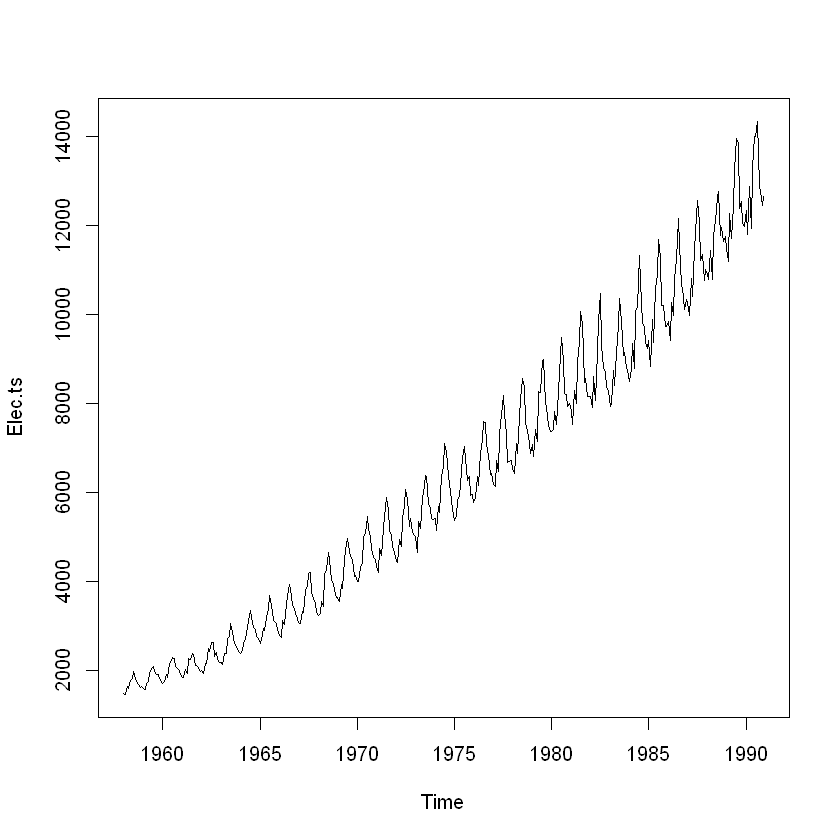

In [21]:
CBE <- read.table(www, header = T)
Elec.ts <- ts(CBE[, 3], start = 1958, freq = 12)

plot(Elec.ts)# como parece aumentar la varianza con el tiempo hago log(Elec.ts)


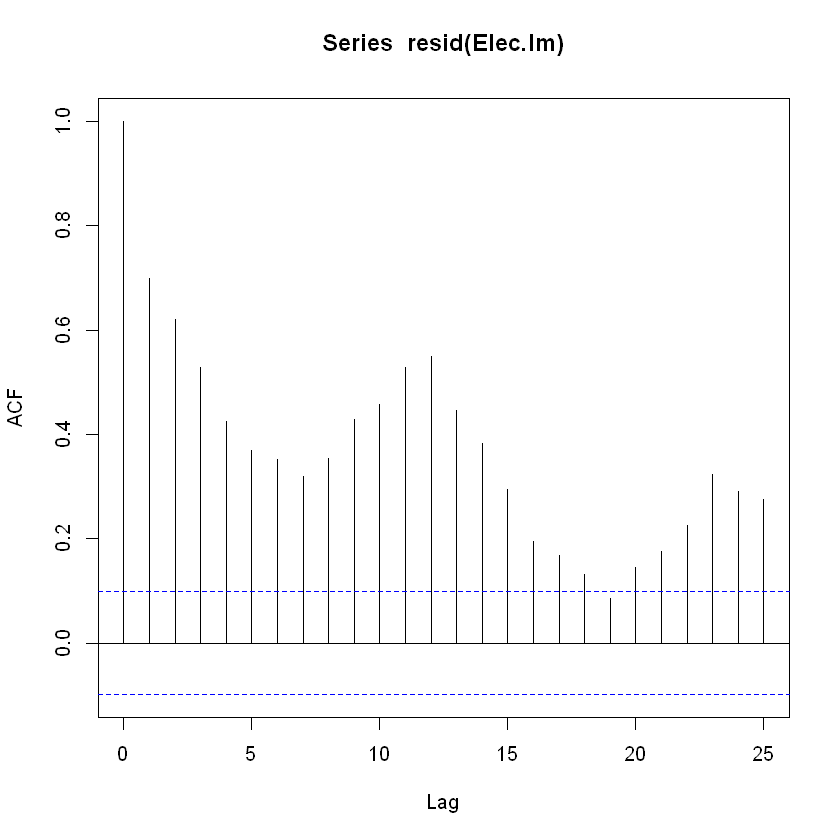

In [22]:
Time <- 1:length(Elec.ts)
Imth <- cycle(Elec.ts)
Elec.lm <- lm(log(Elec.ts) ~ Time + I(Time^2) + factor(Imth))
acf(resid(Elec.lm))


In [23]:
# The correlogram of the residuals appears to cycle with a period of 12 months suggesting that the monthly indicator variables
# are not sufficient to account for the seasonality in the series.

# In the next chapter, we find that this can be accounted for using a non-stationary model with a stochastic seasonal component. 

# In the meantime, we note that the best fitting ARMA(p, q) model can be chosen using the smallest AIC either by trying a range
# of combinations of p and q in the arima function or using a for loop with upper bounds on p and q – taken as 2 in the code shown below.

# To start with, best.aic is initialised to infinity (Inf). After the loop is complete, the best model can be found in best.order.


In [24]:
best.order <- c(0, 0, 0)
best.aic <- Inf
for (i in 0:2) for (j in 0:2) {
  fit.aic <- AIC(arima(resid(Elec.lm), order = c(i, 0,
                                                 j)))
  if (fit.aic < best.aic) {
    best.order <- c(i, 0, j)
    best.arma <- arima(resid(Elec.lm), order = best.order)
    best.aic <- fit.aic
  }
}
    
best.order

[1] 2 0 0

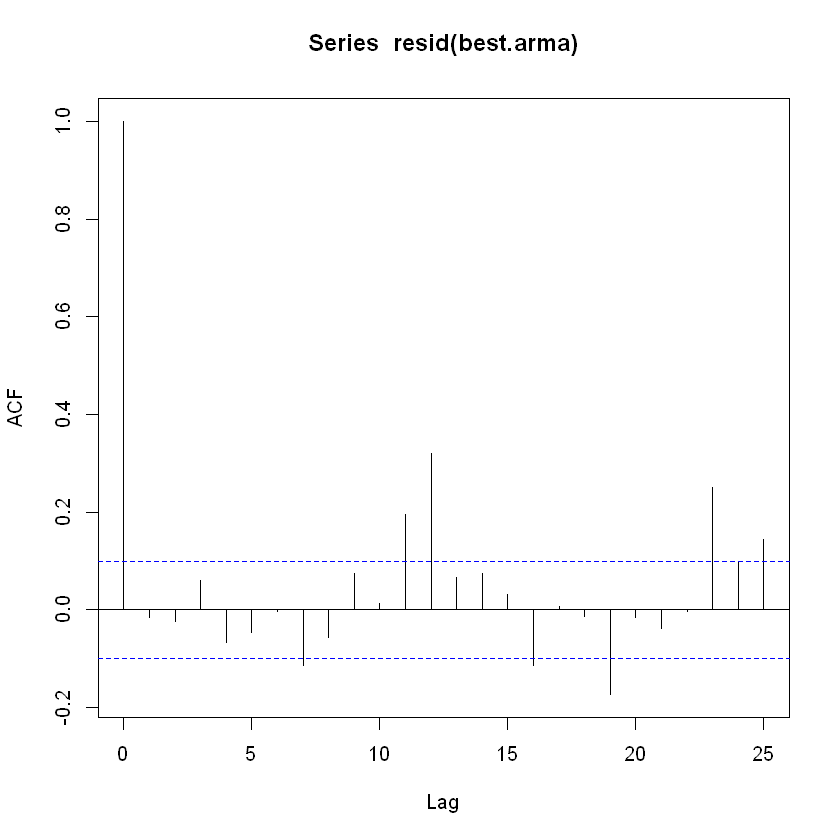

In [25]:
acf(resid(best.arma))

In [26]:
# The 'predict function' can be used both to forecast future values from the fitted regression model and forecast the future errors
# associated with the regression model using the ARMA model fitted to the residuals from the regression.

# These two forecasts can then be summed to give a forecasted value of the logarithm for electricity production,
# which would then need to be antilogged and perhaps adjusted using a bias correction factor.


In [27]:
# For a fitted regression model of class lm, the predict function requires the new set of data to be in the form
# of a data frame (object class data.frame).

# For a fitted ARMA model of class arima, the predict function requires just the number of time steps ahead for the desired forecast. 

# In the latter case, predict produces an object that has both the predicted values and their standard errors,
# which can be extracted using pred and se, respectively.


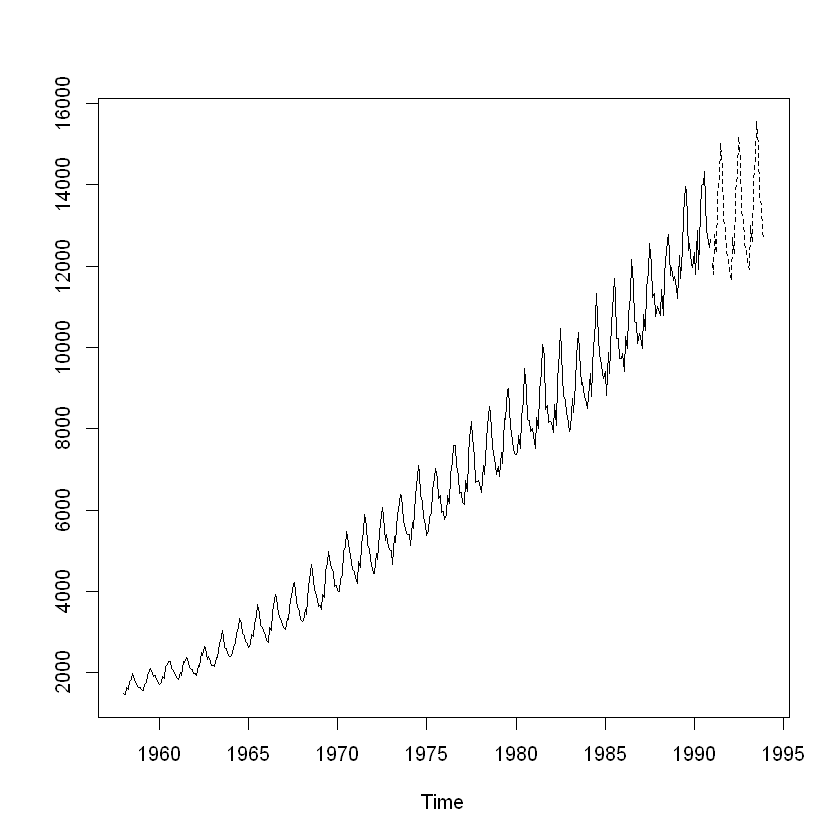

In [28]:
new.time <- seq(length(Elec.ts), length = 36)
new.data <- data.frame(Time = new.time, Imth = rep(1:12, 3))

predict.lm <- predict(Elec.lm, new.data)
predict.arma <- predict(best.arma, n.ahead = 36)
elec.pred <- ts(exp(predict.lm + predict.arma$pred), start = 1991, freq = 12)

ts.plot(cbind(Elec.ts, elec.pred), lty = 1:2)


In [29]:
# The plot of the forecasted values suggests that the predicted values for winter may be underestimated by the fitted model (Figure),
# which may be due to the remaining seasonal autocorrelation in the residuals (see Fig. 6.6).

# This problem will be addressed in the next chapter.


In [30]:
# Wave tank data


In [31]:
www <- 'https://raw.githubusercontent.com/AtefOuni/ts/master/Data/wave.dat'

wave.dat <- read.table(www, header = T)
attach (wave.dat)
layout(1:3)

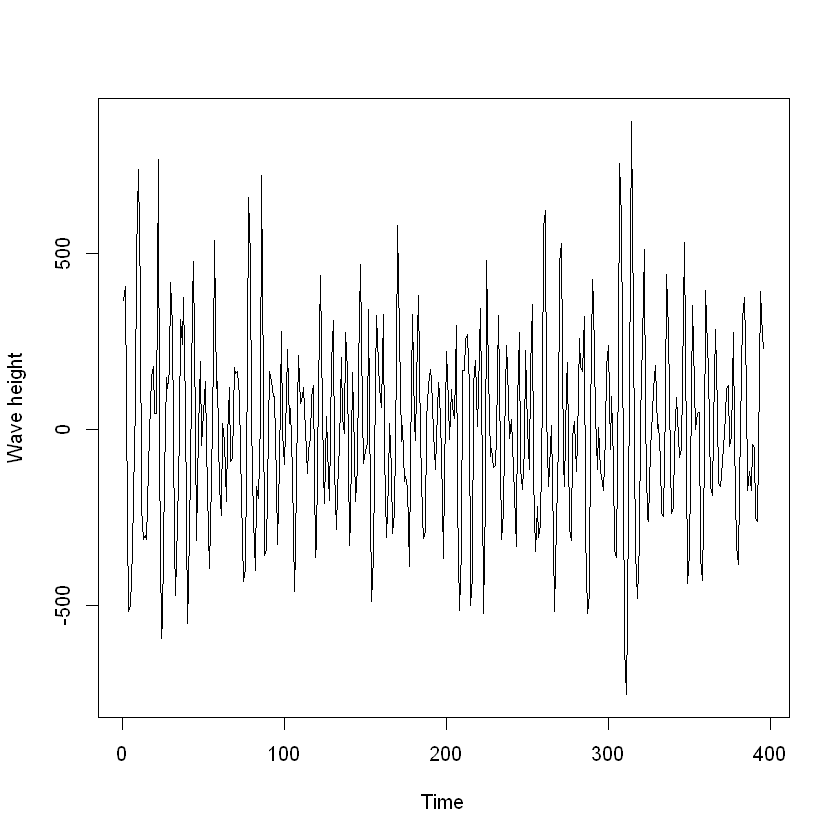

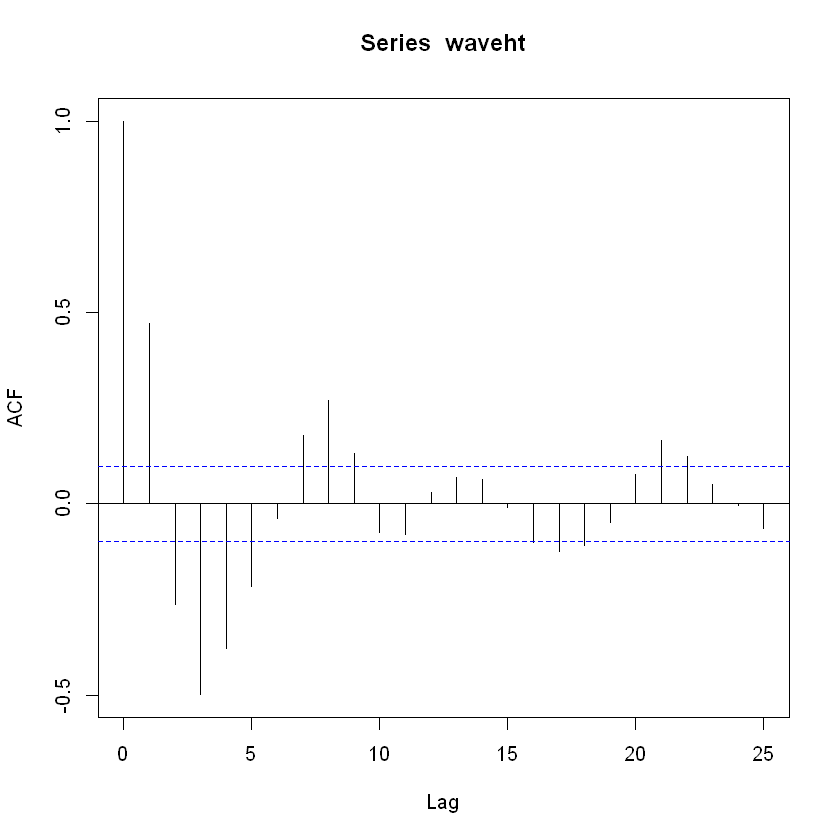

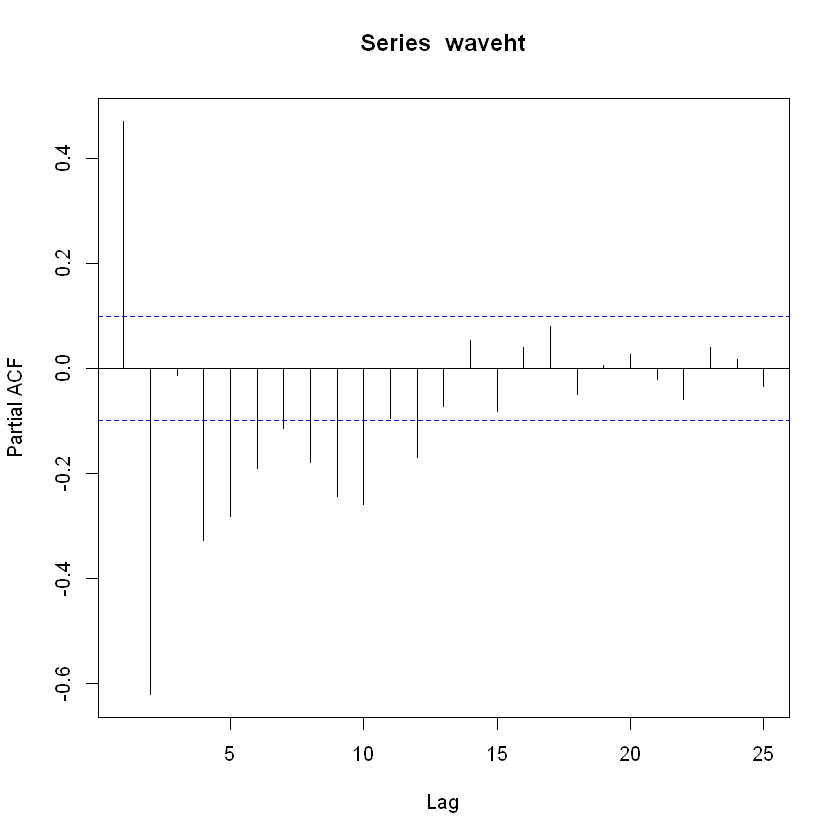

In [32]:
plot (as.ts(waveht), ylab = 'Wave height')
acf (waveht)
pacf (waveht)


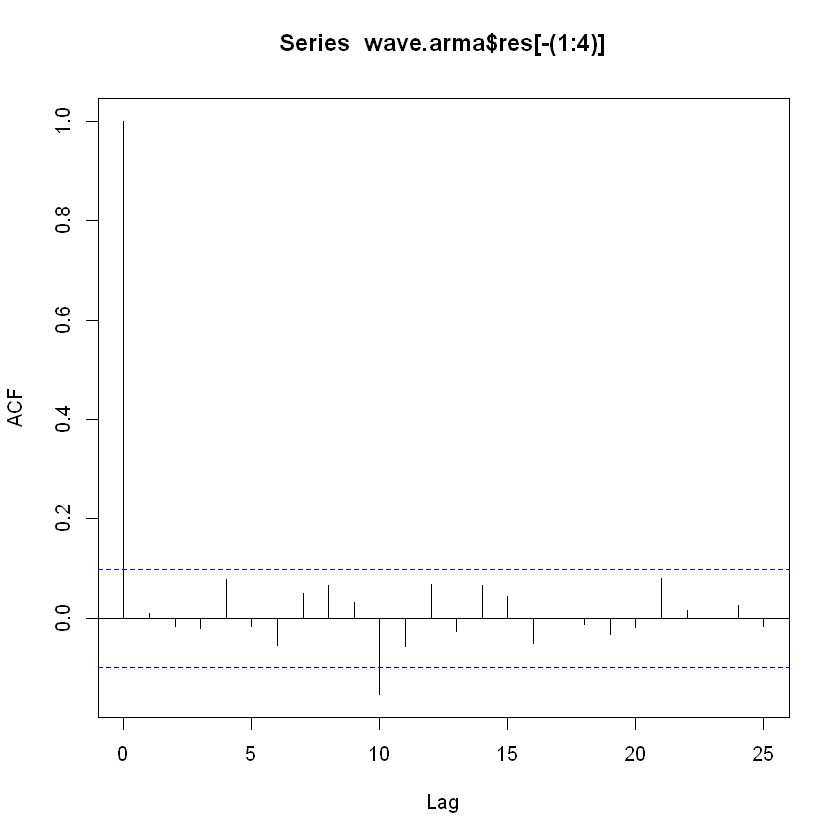

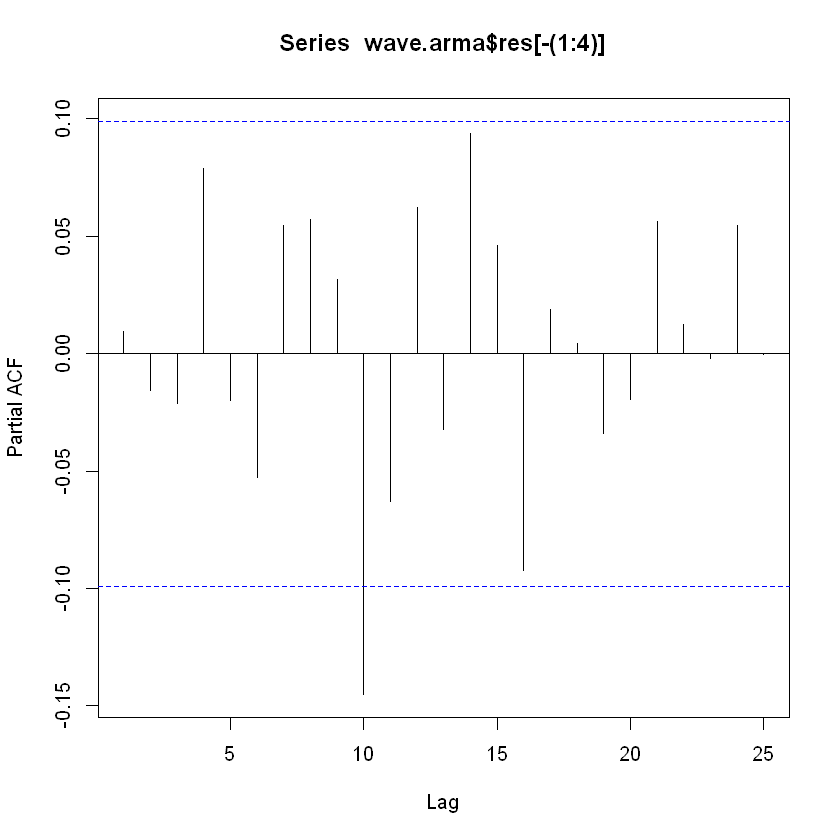

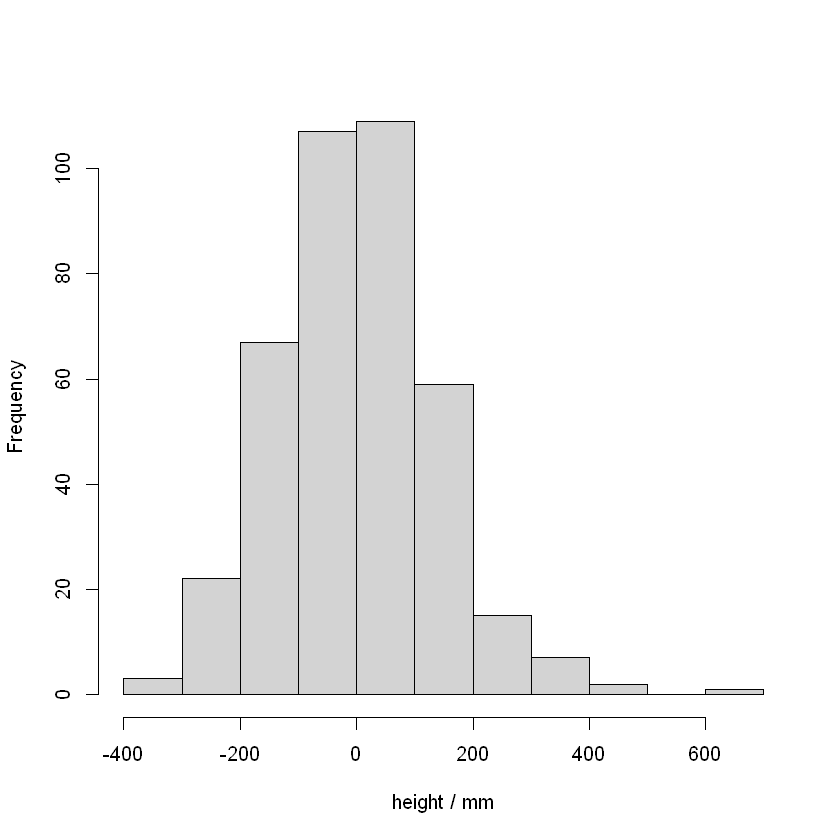

In [33]:
wave.arma <- arima(waveht, order = c(4,0,4))

acf (wave.arma$res[-(1:4)])
pacf (wave.arma$res[-(1:4)])
hist(wave.arma$res[-(1:4)], xlab='height / mm', main='')


In [34]:
detach (wave.dat)